In [35]:
import pandas as pd
import imaplib as plt
import numpy as np

In [36]:
import os
os.chdir('C:/Users/jacob odaudu/Downloads')
cwd = os.getcwd()
cwd

'C:\\Users\\jacob odaudu\\Downloads'

In [37]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print (f)

10_1_Chicago_Payroll_Data_Exercise_2 (1).ipynb
10_1_Chicago_Payroll_Data_Exercise_2.ipynb
10_2_Chicago_Payroll_Data_Exercise_2_Solution.ipynb
15213269.2021.pdf
1_1_Project_Oil_vs_Banks_in_Resession_OverView.ipynb
1_Linear_Regression.ipynb
1_matplotlib_essentials.ipynb
1_NumPy_Essentials (1).ipynb
1_NumPy_Essentials.ipynb
1_Python_Essentials.ipynb
1_Seaborn_intro.ipynb
20190424_214502.jpg
2021 APPCC Assignment Front cover.docx
20220110_203517 (1).jpg
20220110_203517.jpg
210474-60105-30-Will-Share (1).docx
210474-60105-30-Will-Share.docx
2_1_matplotlib_Exercises.ipynb
2_2_matplotlib_Exercises_Sol.ipynb
2_Python_Essentials.ipynb
2_Series (1).ipynb
2_Series (2).ipynb
2_Series (3).ipynb
2_Series (4).ipynb
2_Series.ipynb
3_DataFrame (1).ipynb
3_DataFrame.ipynb
3_Python_Essentials.ipynb
4_1_NumPy_Essentials_Exercises_Overview (1).ipynb
4_1_NumPy_Essentials_Exercises_Overview (2).ipynb
4_1_NumPy_Essentials_Exercises_Overview (3).ipynb
4_1_NumPy_Essentials_Exercises_Overview.ipynb
4_1_Python_Es

In [38]:
crime=pd.read_csv('crimes-2017-18.csv')

C:\Users\jacob odaudu\AppData\Local\Temp\ipykernel_15888\2850876715.py:1: DtypeWarning: Columns (0,2,3,4,5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  crime=pd.read_csv('crimes-2017-18.csv')


In [44]:
#crime.dropna(how='all', inplace=True)
crime.shape[0]

191098

1.What is the total number of burglaries in October 2018? 

In [131]:
#crime['Date'] = crime['Date'].astype(str)
#crime[((crime['Offence Subgroup'] =='Non-domestic burglary') | (crime['Offence Subgroup'] =='Domestic burglary')) & (crime['Date'].apply(lambda x: x[2:]) == '/10/2018')]


In [45]:
crime = crime[crime['Date'].notna()]
mask = crime['Date'].str.contains(r'10/2018')
crime1 = crime[mask]

crime1.shape[0]



9083

9082 total of rows i.e total data

2.What are the different types of burglaries in 2017? 

In [41]:
dif_burg2=crime[(crime['Offence Description '].str.contains(r'burg|Burg'))&(crime['Date'].str.contains(r'/2017'))]
dif_burg2['Offence Description '].value_counts()

Attempted burglary in a dwelling (outcome only)                          850
Attempted Burglary Residential                                           850
Burglary in a building other than a dwelling (outcome only)              850
Aggravated Burglary Business and Community                               850
Attempted burglary in a building other than a dwelling (outcome only)    834
Distraction Burglary Residential                                         815
Distraction burglary in a dwelling (outcome only)                        795
Burglary in a dwelling(outcome only)                                     777
Burglary Residential                                                     758
Aggravated burglary in a building other than a dwelling(outcome only)    754
Aggravated Burglary Residential                                          738
Attempted Burglary Business and Community                                719
Aggravated burglary in a dwelling (outcome only)                         692

In [46]:
'''dif_burg=crime[((crime['Offence Subgroup'] =='Non-domestic burglary') | (crime['Offence Subgroup'] =='Domestic burglary')) & (crime['Date'].apply(lambda x: x[6:]) == '2017')]
dif_burg['Offence Description '].value_counts()'''

"dif_burg=crime[((crime['Offence Subgroup'] =='Non-domestic burglary') | (crime['Offence Subgroup'] =='Domestic burglary')) & (crime['Date'].apply(lambda x: x[6:]) == '2017')]\ndif_burg['Offence Description '].value_counts()"

3.Visualise the total number of burglaries in 2017 and 2018 according to their types?

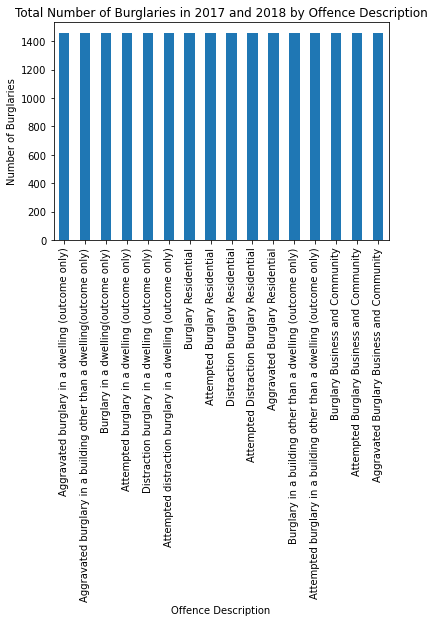

In [47]:
import matplotlib.pyplot as plt

# Get the total number of burglaries in 2017 and 2018 by offence description
total_type=crime[((crime['Offence Subgroup'] =='Non-domestic burglary') | (crime['Offence Subgroup'] =='Domestic burglary'))
&((crime['Date'].apply(lambda x: x[6:]) == '2017')|(crime['Date'].apply(lambda x: x[6:]) == '2018'))]
offence_counts = total_type['Offence Description '].value_counts()

# Plot the data using a bar chart
offence_counts.plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Offence Description')
plt.ylabel('Number of Burglaries')
plt.title('Total Number of Burglaries in 2017 and 2018 by Offence Description')

# Show the chart
plt.show()




4.What is the total number of burglaries related to sexual offences?

In [130]:
sex_off=crime[(crime['Offence Description '].str.contains(r'sex|Sex')&(crime['Offence Description '].str.contains(r'Burg|burg')))]
sex_off


,Financial Year,Financial Quarter,Force Name,CSP Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of offences,Date


the answer is 0

5.Plot a chart of the top 3 offence groups and the least 3 offence groups according to the number of offence?

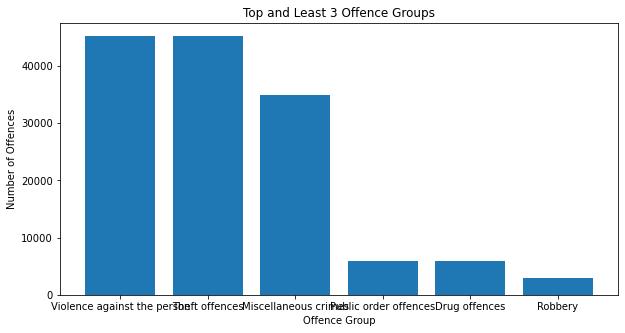

In [20]:
top_three_list = list(crime['Offence Group'].value_counts().head(3).index)
bot_three_list = list(crime['Offence Group'].value_counts().tail(3).index)
top_and_bot_list = top_three_list + bot_three_list
range_6 = crime[crime['Offence Group'].isin(top_and_bot_list)]

plt.figure(figsize=(10,5))
plt.bar(range_6['Offence Group'].value_counts().index, range_6['Offence Group'].value_counts())
plt.xlabel('Offence Group')
plt.ylabel('Number of Offences')
plt.title('Top and Least 3 Offence Groups')
plt.show()



6.List all offences in all months in 2017 till the last day of summer in 2020 (for excel only)

7.What day of the month has the highest number of offences?

In [7]:
crime['Date'].value_counts().head(3)

01/02/2017    596
08/02/2017    588
02/02/2017    588
Name: Date, dtype: int64

answer:01/02/2017

8.Which of the 4 seasons (summer, autumn etc.) has the highest number of robberies in the data (excel only)